# Zillow Wrangle Exercises 

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# custom imports
import acquire_zillow as a

## Acquire and Summarize

### 1.

Acquire data from mySQL using the python module to connect and query. 
- You will want to end with a single dataframe. 
- Make sure to include: the logerror, all fields related to the properties that are available. 
- You will end up using all the tables in the database.
- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [2]:
# get data from SQL database
df = a.get_zillow_data()

In [3]:
df.columns.size

69

In [4]:
# drop all columns that end in id (they are keys from tables and pandas will automatically add an index column that will serve as unique identifier)
df = df.drop(columns=[col for col in df.columns.tolist() if col.endswith('id')])

In [5]:
df.columns.size

57

### 2.

Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [6]:
df.shape

(77381, 57)

In [7]:
df.head().T

,0,1,2,3,4
transactiondate,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,3.0
calculatedbathnbr,3.5,1.0,2.0,3.0,3.0
finishedfloor1squarefeet,NaN,1465.0,NaN,NaN,NaN
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,1312.0
finishedsquarefeet12,3100.0,1465.0,1243.0,2376.0,1312.0
finishedsquarefeet13,NaN,NaN,NaN,NaN,NaN
finishedsquarefeet15,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transactiondate               77381 non-null  object 
 1   basementsqft                  50 non-null     float64
 2   bathroomcnt                   77381 non-null  float64
 3   bedroomcnt                    77381 non-null  float64
 4   calculatedbathnbr             76772 non-null  float64
 5   finishedfloor1squarefeet      6023 non-null   float64
 6   calculatedfinishedsquarefeet  77185 non-null  float64
 7   finishedsquarefeet12          73749 non-null  float64
 8   finishedsquarefeet13          41 non-null     float64
 9   finishedsquarefeet15          3009 non-null   float64
 10  finishedsquarefeet50          6023 non-null   float64
 11  finishedsquarefeet6           386 non-null    float64
 12  fips                          77381 non-null  float64
 13  f

In [9]:
df.describe()

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,50.000000,77381.000000,77381.000000,76772.000000,6023.000000,77185.000000,73749.000000,41.000000,3009.000000,6023.000000,...,17560.000000,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000
mean,679.720000,2.299130,3.053489,2.316867,1366.512535,1785.219939,1760.522543,1389.853659,2357.791625,1381.771542,...,1.434738,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,0.016625
std,689.703546,0.996651,1.139096,0.979755,671.308125,954.049286,934.024340,123.531688,1188.775210,726.468878,...,0.544569,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,0.170191
min,38.000000,0.000000,0.000000,1.000000,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,273.000000,2.000000,2.000000,2.000000,955.000000,1182.000000,1172.000000,1344.000000,1625.000000,956.000000,...,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,-0.024377
50%,515.000000,2.000000,3.000000,2.000000,1257.000000,1543.000000,1523.000000,1440.000000,2094.000000,1259.000000,...,1.000000,1.0,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,0.006627
75%,796.500000,3.000000,4.000000,3.000000,1615.000000,2113.000000,2076.000000,1440.000000,2838.000000,1621.500000,...,2.000000,1.0,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,0.039203
max,3560.000000,18.000000,16.000000,18.000000,6912.000000,35640.000000,21929.000000,1560.000000,35640.000000,12467.000000,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


In [10]:
cat_cols = df.select_dtypes('object').columns.tolist()
len(cat_cols)

11

In [11]:
for cat in cat_cols:
    print(f'{cat}\n---------------------------------')
    print(df[cat].value_counts())
    print('\n---------------------------------')
    print(df[cat].value_counts(normalize=True))
    print('================================\n\n')

transactiondate
---------------------------------
2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
              ... 
2017-07-09       1
2017-06-03       1
2017-08-06       1
2017-09-25       1
2017-02-18       1
Name: transactiondate, Length: 265, dtype: int64

---------------------------------
2017-06-30    0.015366
2017-04-28    0.011773
2017-05-31    0.011204
2017-07-28    0.010519
2017-08-31    0.010093
                ...   
2017-07-09    0.000013
2017-06-03    0.000013
2017-08-06    0.000013
2017-09-25    0.000013
2017-02-18    0.000013
Name: transactiondate, Length: 265, dtype: float64


propertycountylandusecode
---------------------------------
0100    26714
122     13045
010C     8813
0101     6399
34       4922
        ...  
040B        1
012D        1
020E        1
030G        1
1432        1
Name: propertycountylandusecode, Length: 75, dtype: int64

---------------------------------
0100    0.345227
122     0.168581
010C    0.

In [12]:
num_cols = df.select_dtypes('number').columns.tolist()
len(num_cols)

46

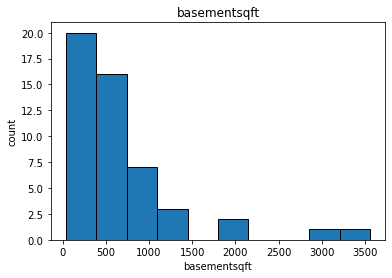

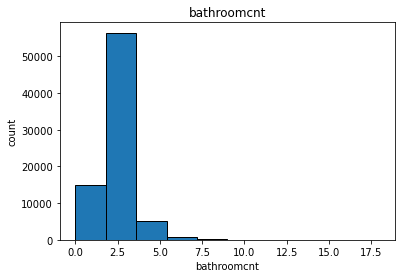

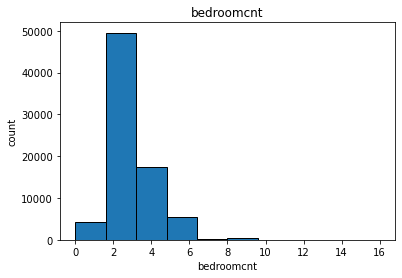

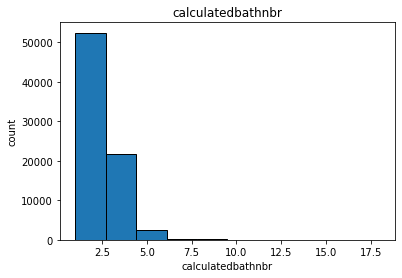

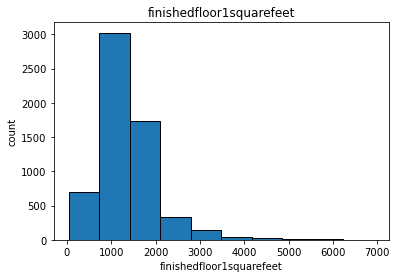

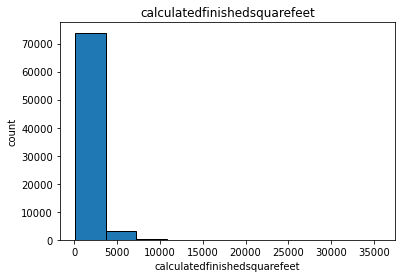

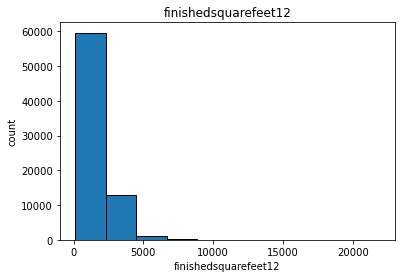

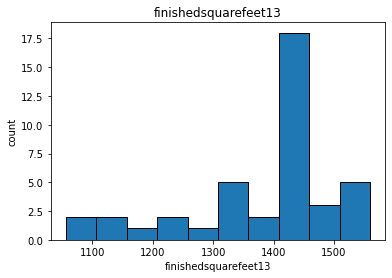

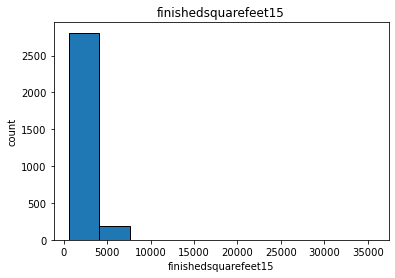

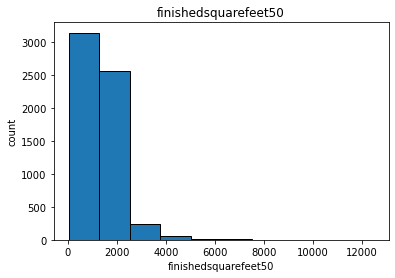

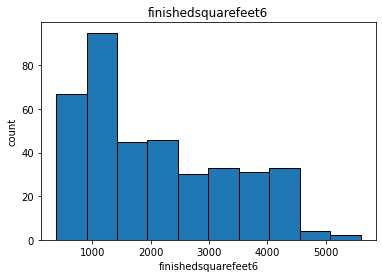

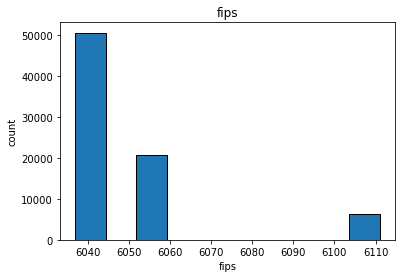

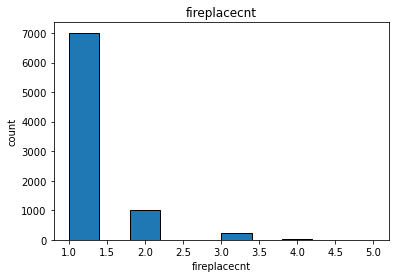

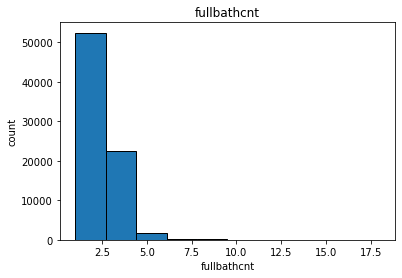

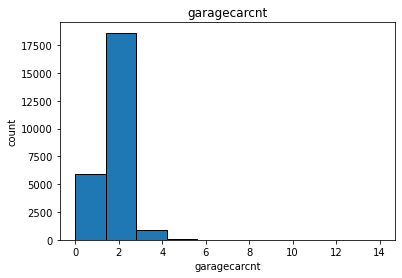

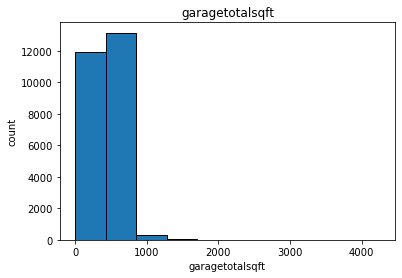

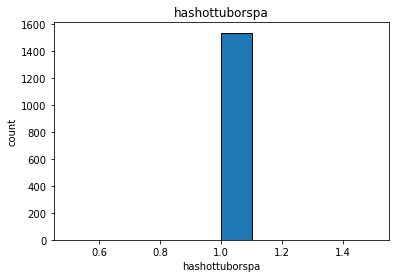

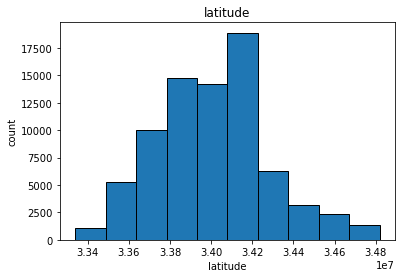

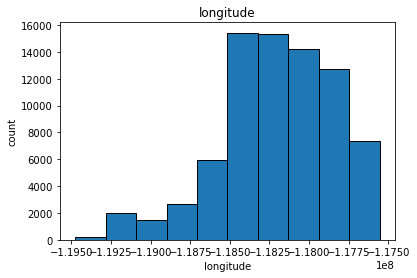

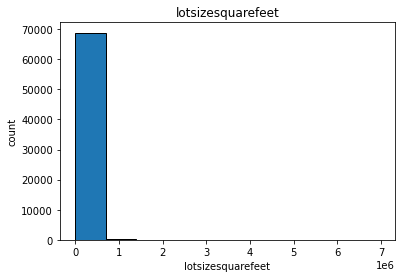

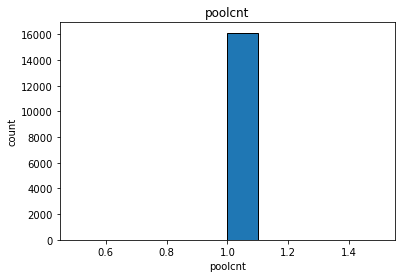

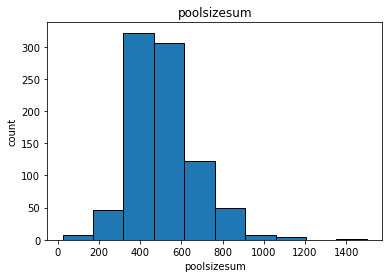

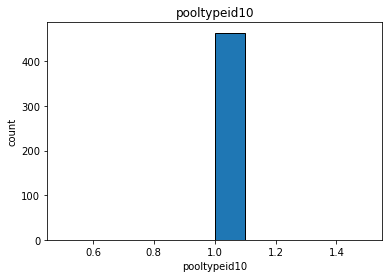

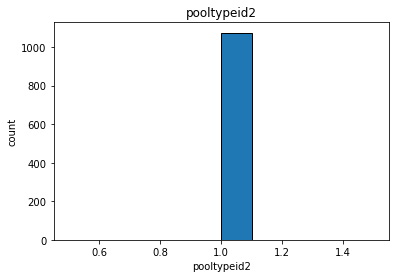

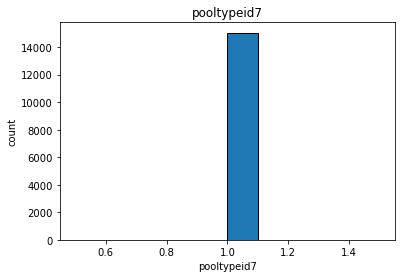

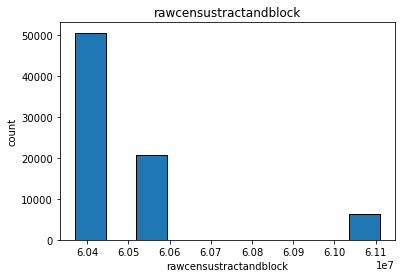

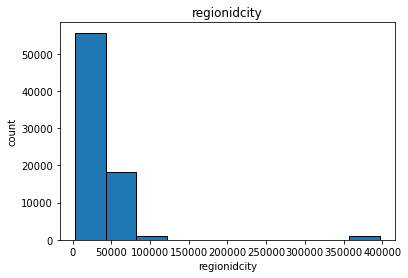

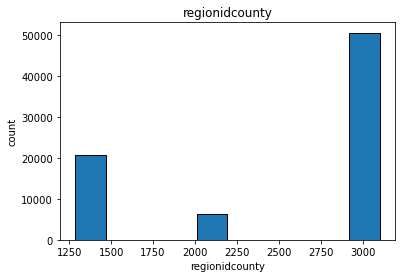

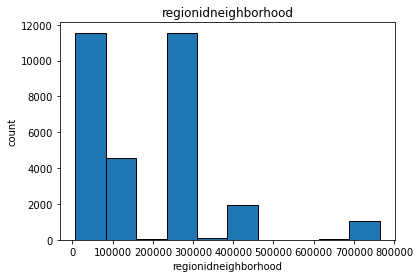

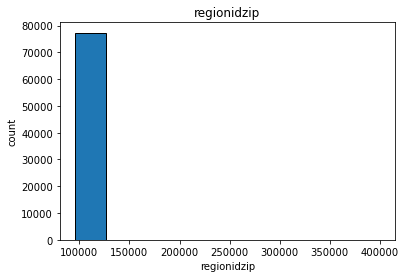

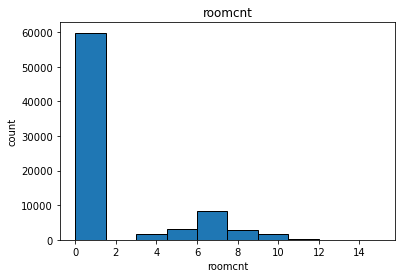

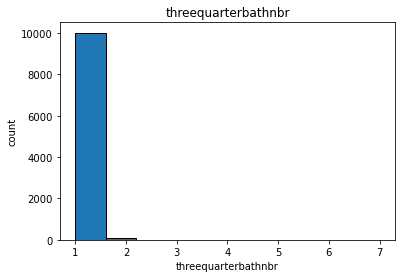

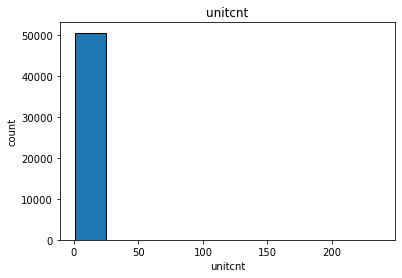

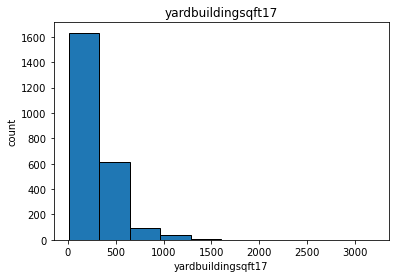

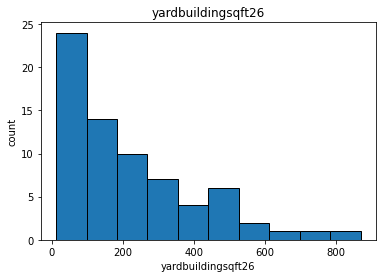

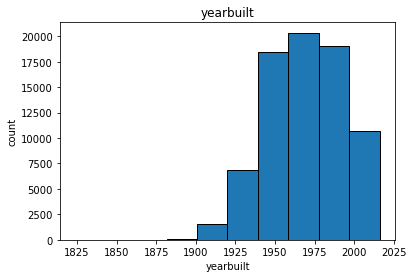

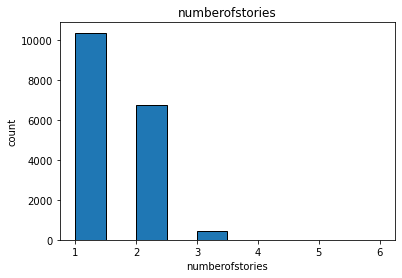

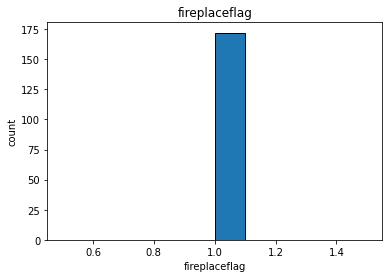

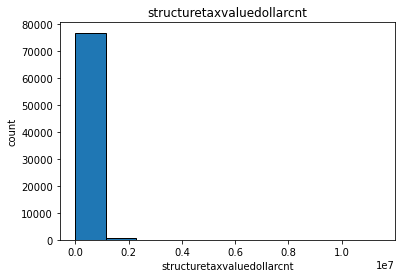

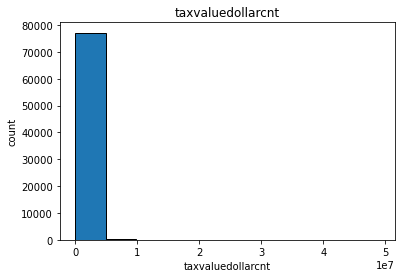

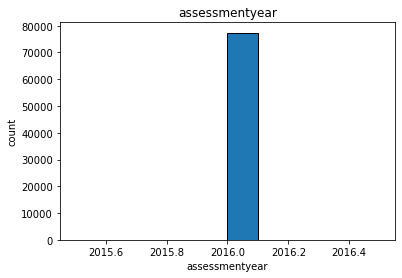

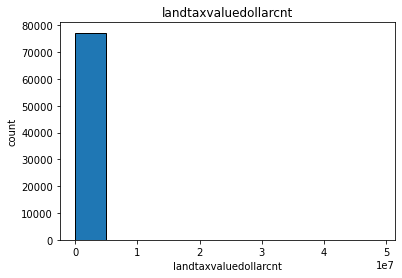

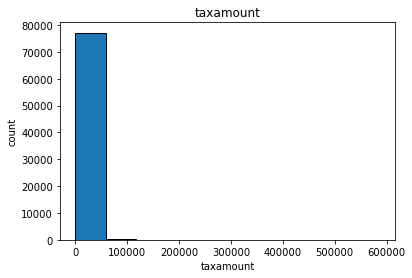

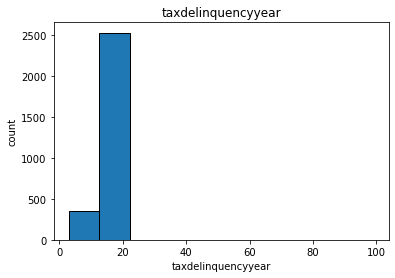

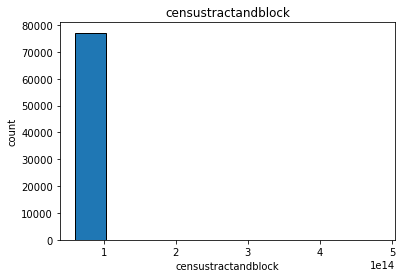

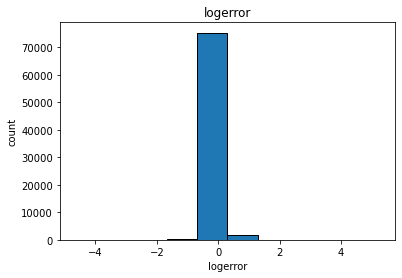

In [13]:
for col in num_cols:
    df[col].hist(edgecolor='black')
    plt.xlabel(col)
    plt.title(col)
    plt.ylabel('count')
    plt.grid(False)
    plt.show()      

In [14]:
# for col in num_cols:
#     sns.boxplot(y=col, data=df, color='green')
#     plt.show()
#     plt.tight_layout();

In [15]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # value_counts()
    # observation of nulls in the dataframe
    '''
    print('=====================================================')
    print('Dataframe head: ')
    print(df.head(3).to_markdown())
    print('=====================================================')
    print('Dataframe info: ')
    print(df.info())
    print('=====================================================')
    print('Dataframe Description: ')
    print(df.describe().to_markdown())
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    cat_cols = [col for col in df.columns if col not in num_cols]
    print('=====================================================')
    print('DataFrame value counts: ')
    for col in df.columns:
        if col in cat_cols:
            print(df[col].value_counts())
            print(df[col].value_counts(normalize=True))
        else:
            print(df[col].value_counts(bins=10, sort=False))
    print('=====================================================')
    print('nulls in dataframe by column: ')
    print(nulls_by_col(df).to_markdown())
    print('=====================================================')
    print('nulls in dataframe by row: ')
    print(nulls_by_row(df).to_markdown())
    print('=====================================================')

In [16]:
# summarize(df)

### 3.

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where:
- each row is an atttribute name
- the first column is the number of rows with missing values for that attribute
- the second column is percent of total rows that have missing values for that attribute.

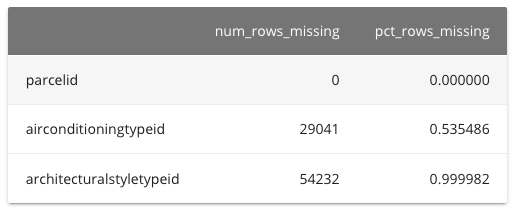

Run the function and document takeaways from this on how you want to handle missing values.

In [17]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = round(num_missing / rows * 100, 2)
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

In [18]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
transactiondate,0,0.00
basementsqft,77331,99.94
bathroomcnt,0,0.00
bedroomcnt,0,0.00
calculatedbathnbr,609,0.79
finishedfloor1squarefeet,71358,92.22
calculatedfinishedsquarefeet,196,0.25
finishedsquarefeet12,3632,4.69
finishedsquarefeet13,77340,99.95
finishedsquarefeet15,74372,96.11


**Takeaways:**
- Determine a threshold and eliminate columns that are below that threshold
- After doing above, take a look at remaining columns to see which are redundant (for redudant columns, keep one with most data)

### 4.

Write a function that takes in a dataframe and returns a dataframe with 3 columns: 
- the number of columns missing 
- percent of columns missing
- number of rows with n columns missing. 

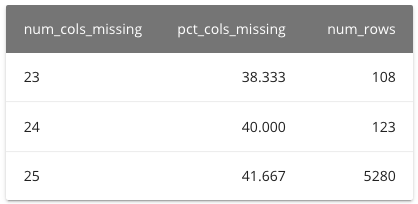

Run the function and document takeaways from this on how you want to handle missing values.

In [19]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = round(num_missing / df.shape[1] * 100, 2)
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [20]:
nulls_by_row(df)

,num_cols_missing,percent_cols_missing,num_rows
0,18,31.58,6
1,19,33.33,48
2,20,35.09,249
3,21,36.84,443
4,22,38.60,617
5,23,40.35,1158
6,24,42.11,7478
7,25,43.86,9219
8,26,45.61,11865
9,27,47.37,21200


## Prepare

### 1.

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). 
   - There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. 
   - But for this exercise, do not purely filter by unitcnt as we did previously. 
   - Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [21]:
df.propertylandusedesc.value_counts()

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [22]:
df.shape

(77381, 57)

In [23]:
df = df[(df.propertylandusedesc == 'Single Family Residential') | (df.propertylandusedesc == 'Mobile Home') | (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes')]

In [24]:
df.shape

(52452, 57)

### 2.

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).
- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

Hint:
- Look up the dropna documentation.
- You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
- Make use of inplace, i.e. inplace=True/False.

In [25]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold)
    return df

In [26]:
df.shape

(52452, 57)

In [27]:
df = handle_missing_values(df)

In [28]:
df.shape

(52369, 29)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52369 entries, 0 to 77380
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transactiondate               52369 non-null  object 
 1   bathroomcnt                   52369 non-null  float64
 2   bedroomcnt                    52369 non-null  float64
 3   calculatedbathnbr             52280 non-null  float64
 4   calculatedfinishedsquarefeet  52351 non-null  float64
 5   finishedsquarefeet12          52145 non-null  float64
 6   fips                          52369 non-null  float64
 7   fullbathcnt                   52280 non-null  float64
 8   latitude                      52369 non-null  float64
 9   longitude                     52369 non-null  float64
 10  lotsizesquarefeet             52011 non-null  float64
 11  propertycountylandusecode     52369 non-null  object 
 12  propertyzoningdesc            33803 non-null  object 
 13  r

### 3.

Decide how to handle the remaining missing values:
- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [30]:
df.shape

(52369, 29)

In [31]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
transactiondate,0,0.00
bathroomcnt,0,0.00
bedroomcnt,0,0.00
calculatedbathnbr,89,0.17
calculatedfinishedsquarefeet,18,0.03
finishedsquarefeet12,224,0.43
fips,0,0.00
fullbathcnt,89,0.17
latitude,0,0.00
longitude,0,0.00


In [32]:
df.head().T

,0,1,2,3,6
transactiondate,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,4.0
calculatedbathnbr,3.5,1.0,2.0,3.0,3.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,2962.0
finishedsquarefeet12,3100.0,1465.0,1243.0,2376.0,2962.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0
fullbathcnt,3.0,1.0,2.0,3.0,3.0
latitude,33634931.0,34449266.0,33886168.0,34245180.0,34145202.0
longitude,-117869207.0,-119281531.0,-117823170.0,-118240722.0,-118179824.0


In [33]:
# lets take a look at calculatedbathnbr column compared to bathroomcnt column to see if former is adding any value
(df['calculatedbathnbr'][df.calculatedbathnbr != df.bathroomcnt]).size == (df['calculatedbathnbr'][df.calculatedbathnbr != df.bathroomcnt]).isnull().sum()
# all values that arent the same are nulls for calculatedbathnbr, not adding any value, whole column should be dropped

True

In [34]:
# lets take a look at calculatedfinishedsquarefeet column compared to finishedsquarefeet12 column to see if former is adding any value
(df['finishedsquarefeet12'][df.finishedsquarefeet12 != df.calculatedfinishedsquarefeet]).size == (df['finishedsquarefeet12'][df.finishedsquarefeet12 != df.calculatedfinishedsquarefeet]).isnull().sum()
# all different values are nulls, drop

True

In [35]:
# what to do with remaining nulls in calculatedfinishedsquarefeet
df.calculatedfinishedsquarefeet.isna().sum()

18

In [36]:
df.calculatedfinishedsquarefeet.median()

1658.0

In [37]:
df.calculatedfinishedsquarefeet.mean()

1922.4068308150752

In [38]:
# impute with median
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.fillna(df.calculatedfinishedsquarefeet.median())

In [39]:
df.calculatedfinishedsquarefeet.isna().sum()

0

In [40]:
# same process with fullbathcount
(df['fullbathcnt'][df.fullbathcnt != df.bathroomcnt]).size == (df['fullbathcnt'][df.fullbathcnt != df.bathroomcnt]).isnull().sum()

False

In [41]:
(df.fullbathcnt != df.bathroomcnt).sum()

6806

In [42]:
(df.fullbathcnt != df.bathroomcnt).isnull().sum()

0

In [43]:
# redundant info, all necessary info is contained in bathroomcnt and it has less missing values, drop fullbathcnt

In [44]:
# lotsizesqft
df.lotsizesquarefeet.median()

6840.0

In [45]:
df.lotsizesquarefeet.mean()

11382.166714733421

In [46]:
# better to impute with median
df.lotsizesquarefeet = df.lotsizesquarefeet.fillna(df.lotsizesquarefeet.median())

In [47]:
df.lotsizesquarefeet.isna().sum()

0

In [48]:
# propertyzoningdesc
df.propertyzoningdesc.nunique()

1289

In [49]:
df.propertyzoningdesc.value_counts(normalize=True)

LAR1          0.191640
LARS          0.040825
LBR1N         0.032808
SCUR2         0.021063
LARA          0.018105
                ...   
BRR17500*     0.000030
GDE4*         0.000030
LCR16000-R    0.000030
ARR110000*    0.000030
RPD-5000      0.000030
Name: propertyzoningdesc, Length: 1289, dtype: float64

In [50]:
# impute with most commonly occuring code
df.propertyzoningdesc = df.propertyzoningdesc.fillna(df.propertyzoningdesc.mode().tolist()[0])

In [51]:
df.propertyzoningdesc.isna().sum()

0

In [52]:
# regionidcity
df.regionidcity.value_counts(normalize=True)
# will use most commonly occuring city for exercises, better approach would be to use lat and long or more geographically specific column to find city and impute that way

12447.0    0.222385
5534.0     0.035158
40227.0    0.029179
46298.0    0.027757
16764.0    0.021056
             ...   
32927.0    0.000058
31134.0    0.000039
10815.0    0.000019
36078.0    0.000019
21395.0    0.000019
Name: regionidcity, Length: 175, dtype: float64

In [53]:
df.regionidcity = df.regionidcity.fillna(df.regionidcity.mode().tolist()[0])

In [54]:
# regionidzip
df.regionidzip.value_counts(normalize=True)

97319.0    0.015016
97318.0    0.012876
97329.0    0.010794
97328.0    0.009953
97118.0    0.009495
             ...   
96002.0    0.000038
96467.0    0.000019
97092.0    0.000019
96038.0    0.000019
96148.0    0.000019
Name: regionidzip, Length: 380, dtype: float64

In [55]:
# not really a significantly most common zip, just drop nulls instead of imputing for this one (after doing all imputation, drop all remaining nulls at same time)

In [56]:
# unitcnt
df.unitcnt.value_counts(normalize=True)

1.0    0.999172
2.0    0.000798
3.0    0.000030
Name: unitcnt, dtype: float64

In [57]:
df.unitcnt.value_counts()

1.0    33787
2.0       27
3.0        1
Name: unitcnt, dtype: int64

In [58]:
df.unitcnt.isna().sum()

18554

In [59]:
df.unitcnt = df.unitcnt.fillna(1)

In [60]:
# heatingorsystemdesc
df.heatingorsystemdesc.value_counts(normalize=True)

Central       0.611196
Floor/Wall    0.370074
Forced air    0.015273
Solar         0.002511
None          0.000473
Baseboard     0.000207
Radiant       0.000177
Gravity       0.000059
Yes           0.000030
Name: heatingorsystemdesc, dtype: float64

In [61]:
# fill with most commonly occuring value
df.heatingorsystemdesc = df.heatingorsystemdesc.fillna('Central')

In [62]:
# drop the rest of the nulls
df = df.dropna()

In [63]:
df = df.drop(columns=['calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'rawcensustractandblock'])

In [64]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
transactiondate,0,0.0
bathroomcnt,0,0.0
bedroomcnt,0,0.0
calculatedfinishedsquarefeet,0,0.0
fips,0,0.0
latitude,0,0.0
longitude,0,0.0
lotsizesquarefeet,0,0.0
propertycountylandusecode,0,0.0
propertyzoningdesc,0,0.0


In [65]:
nulls_by_row(df)

,num_cols_missing,percent_cols_missing,num_rows
0,0,0.0,51900


In [66]:
df.shape

(51900, 25)

In [67]:
num_cols = df.select_dtypes('number').columns.tolist()

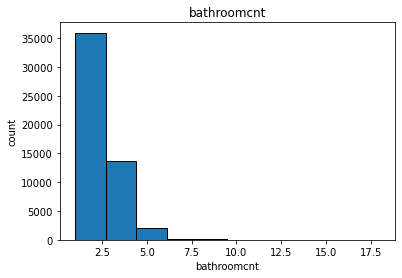

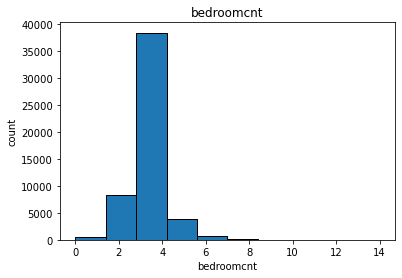

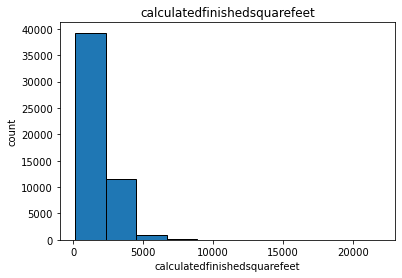

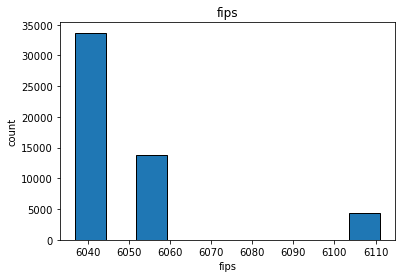

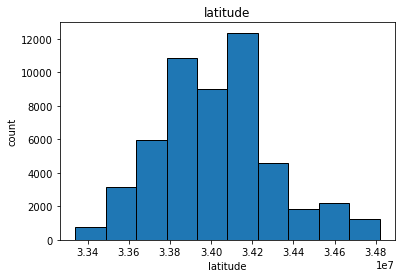

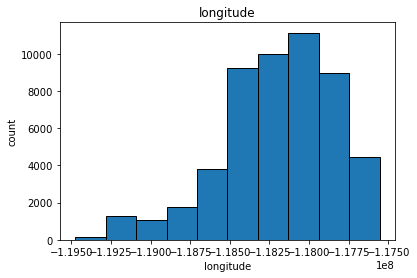

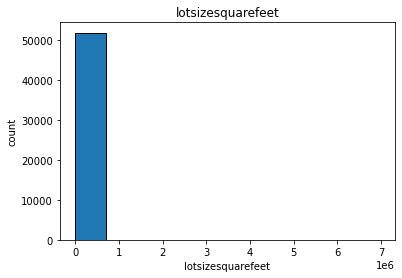

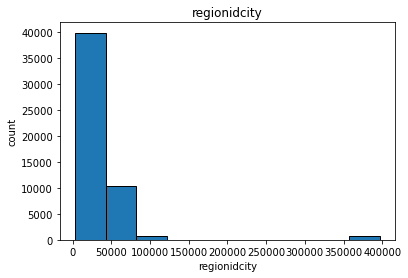

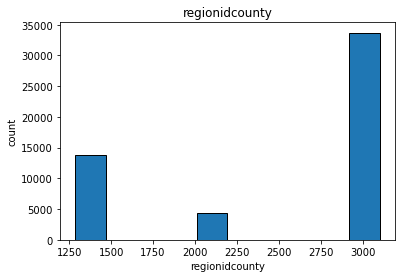

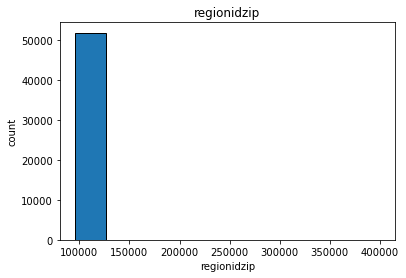

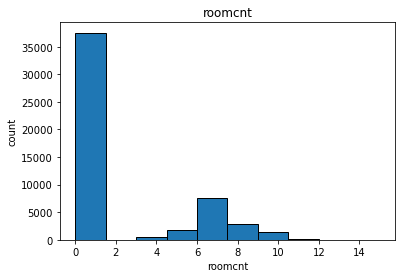

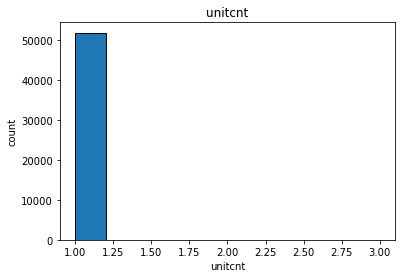

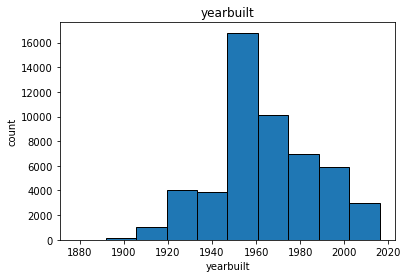

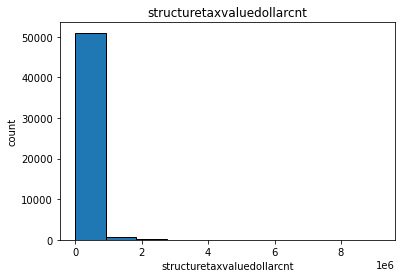

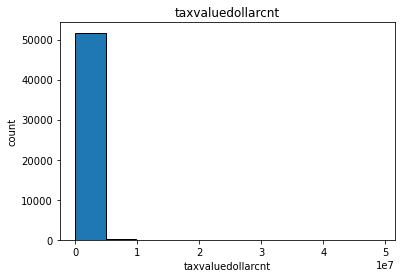

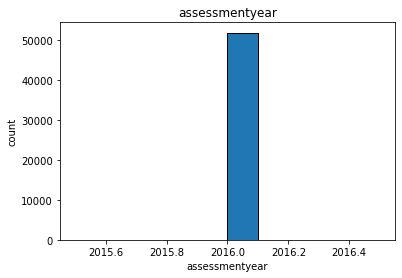

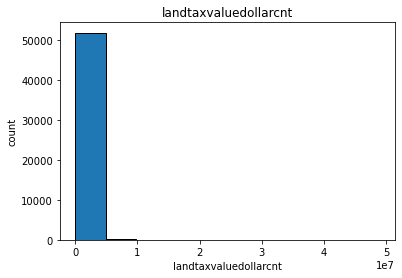

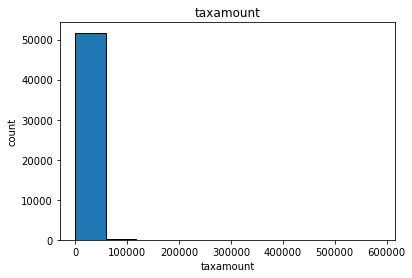

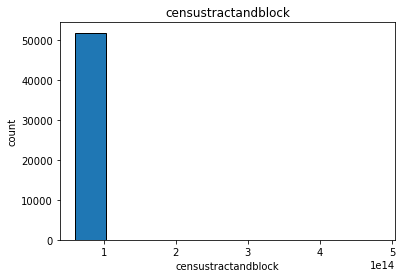

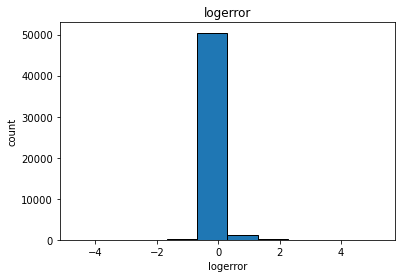

In [68]:
for col in num_cols:
    df[col].hist(edgecolor='black')
    plt.xlabel(col)
    plt.title(col)
    plt.ylabel('count')
    plt.grid(False)
    plt.show()     

**Columns to convert to objects (categorical):**
- fips (use code from last project)
    - convert from fips to name of county using lambda function
- censustractandblock
    - recapture leading O and convert to object
- regionidcity
    - Can't find anything with quick google search, will just drop for now
- regionidcounty
    - Can't find anything with quick google search, will just drop for now
- regionidzip
    - convert to object

In [69]:
# fips conversion
df['county'] = df['fips'].apply(lambda x: 'Los Angeles' if x == 6037 else 'Orange' if x == 6059 else 'Ventura')
df = df.drop(columns='fips')

In [70]:
df.censustractandblock = '0' + df.censustractandblock.astype('int').astype('string').astype('object')

In [71]:
df = df.drop(columns=['regionidcity', 'regionidcounty'])

In [72]:
df['zip'] = df.regionidzip.astype(int).astype('object')
df = df.drop(columns='regionidzip')

In [73]:
df.head().T

,0,1,2,3,6
transactiondate,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,4.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,2962.0
latitude,33634931.0,34449266.0,33886168.0,34245180.0,34145202.0
longitude,-117869207.0,-119281531.0,-117823170.0,-118240722.0,-118179824.0
lotsizesquarefeet,4506.0,12647.0,8432.0,13038.0,63000.0
propertycountylandusecode,122,1110,122,0101,0101
propertyzoningdesc,LAR1,LAR1,LAR1,LCR110000*,PSR2
roomcnt,0.0,5.0,6.0,0.0,0.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51900 entries, 0 to 77380
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transactiondate               51900 non-null  object 
 1   bathroomcnt                   51900 non-null  float64
 2   bedroomcnt                    51900 non-null  float64
 3   calculatedfinishedsquarefeet  51900 non-null  float64
 4   latitude                      51900 non-null  float64
 5   longitude                     51900 non-null  float64
 6   lotsizesquarefeet             51900 non-null  float64
 7   propertycountylandusecode     51900 non-null  object 
 8   propertyzoningdesc            51900 non-null  object 
 9   roomcnt                       51900 non-null  float64
 10  unitcnt                       51900 non-null  float64
 11  yearbuilt                     51900 non-null  float64
 12  structuretaxvaluedollarcnt    51900 non-null  float64
 13  t

**Columns to convert to ints:**
- bedroomcnt
- calculatedfinishedsquarefeet
- lat
- long
- lotsizesquarefeet
- roomcnt
- unitcnt
- yearbuilt
 - assessmentyear (maybe drop this column if all from same year)

In [75]:
df = df.drop(columns='assessmentyear')

In [76]:
df.transactiondate

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
6        2017-01-01
            ...    
77376    2017-09-20
77377    2017-09-21
77378    2017-09-21
77379    2017-09-25
77380    2018-05-25
Name: transactiondate, Length: 51900, dtype: object

In [77]:
unit_type_dict = {
    'bedroomcnt' : 'int',
    'calculatedfinishedsquarefeet' : 'int',
    'latitude' : 'int',
    'longitude' : 'int',
    'lotsizesquarefeet' : 'int',
    'roomcnt' : 'int',
    'unitcnt' : 'int',
    'yearbuilt' : 'int',
    'transactiondate' : 'datetime64'
}

In [78]:
df = df.astype(unit_type_dict)

In [79]:
df.transactiondate = df.transactiondate.dt.date

In [80]:
type(df.transactiondate[0])

datetime.date

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51900 entries, 0 to 77380
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transactiondate               51900 non-null  object 
 1   bathroomcnt                   51900 non-null  float64
 2   bedroomcnt                    51900 non-null  int64  
 3   calculatedfinishedsquarefeet  51900 non-null  int64  
 4   latitude                      51900 non-null  int64  
 5   longitude                     51900 non-null  int64  
 6   lotsizesquarefeet             51900 non-null  int64  
 7   propertycountylandusecode     51900 non-null  object 
 8   propertyzoningdesc            51900 non-null  object 
 9   roomcnt                       51900 non-null  int64  
 10  unitcnt                       51900 non-null  int64  
 11  yearbuilt                     51900 non-null  int64  
 12  structuretaxvaluedollarcnt    51900 non-null  float64
 13  t

In [82]:
num_cols = df.select_dtypes('number').columns.tolist()

In [83]:
# # create function to remove outliers
# Q1 = np.percentile(df.bathroomcnt, 25, interpolation='midpoint')
# Q3 = np.percentile(df.bathroomcnt, 75, interpolation='midpoint')
# IQR = Q3 - Q1
# UB = Q3 + (1.5 * IQR)
# LB = Q1 - (1.5 * IQR)
# df = df[(df.bathroomcnt < UB) & (df.bathroomcnt > LB)]

In [84]:
# remove outliers
def remove_outliers(df):
    num_cols = df.select_dtypes('number').columns.tolist()
    for col in num_cols:
        Q1, Q3 = df[col].quantile([.25, 0.75])
        IQR = Q3 - Q1
        UB = Q3 + (1.5 * IQR)
        LB = Q1 - (1.5 * IQR)
        df = df[(df[col] < UB) & (df[col] > LB)]
    return df

In [85]:
# def remove_outliers(df):
#     num_cols = df.select_dtypes('number').columns.tolist()
#     for col in num_cols:
#         Q1 = np.percentile(df[col], 25, interpolation='midpoint')
#         Q3 = np.percentile(df[col], 75, interpolation='midpoint')
#         IQR = Q3 - Q1
#         UB = Q3 + (1.5 * IQR)
#         LB = Q1 - (1.5 * IQR)
#         df = df[(df[col] < UB) & (df[col] > LB)]
#     return df

In [86]:
df.shape

(51900, 22)

In [87]:
# df = remove_outliers(df)

In [88]:
df.shape

(51900, 22)

In [90]:
df.head().T

,0,1,2,3,6
transactiondate,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4,2,3,4,4
calculatedfinishedsquarefeet,3100,1465,1243,2376,2962
latitude,33634931,34449266,33886168,34245180,34145202
longitude,-117869207,-119281531,-117823170,-118240722,-118179824
lotsizesquarefeet,4506,12647,8432,13038,63000
propertycountylandusecode,122,1110,122,0101,0101
propertyzoningdesc,LAR1,LAR1,LAR1,LCR110000*,PSR2
roomcnt,0,5,6,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51900 entries, 0 to 77380
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transactiondate               51900 non-null  object 
 1   bathroomcnt                   51900 non-null  float64
 2   bedroomcnt                    51900 non-null  int64  
 3   calculatedfinishedsquarefeet  51900 non-null  int64  
 4   latitude                      51900 non-null  int64  
 5   longitude                     51900 non-null  int64  
 6   lotsizesquarefeet             51900 non-null  int64  
 7   propertycountylandusecode     51900 non-null  object 
 8   propertyzoningdesc            51900 non-null  object 
 9   roomcnt                       51900 non-null  int64  
 10  unitcnt                       51900 non-null  int64  
 11  yearbuilt                     51900 non-null  int64  
 12  structuretaxvaluedollarcnt    51900 non-null  float64
 13  t

In [92]:
df.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror
count,51900.000000,51900.000000,51900.000000,5.190000e+04,5.190000e+04,5.190000e+04,51900.000000,51900.000000,51900.000000,5.190000e+04,5.190000e+04,5.190000e+04,51900.000000,51900.000000
mean,2.305588,3.309461,1923.074316,3.402395e+07,-1.181947e+08,1.130921e+04,1.887514,1.000424,1963.461021,1.954229e+05,5.253299e+05,3.299070e+05,6399.472952,0.018279
std,1.014295,0.933385,999.170670,2.741411e+05,3.562624e+05,8.676243e+04,3.145701,0.021500,23.052067,2.515684e+05,7.426331e+05,5.606921e+05,8630.743682,0.174286
min,1.000000,0.000000,152.000000,3.334062e+07,-1.194753e+08,2.360000e+02,0.000000,1.000000,1878.000000,1.480000e+02,3.254000e+03,1.610000e+02,49.180000,-4.655420
25%,2.000000,3.000000,1270.000000,3.382796e+07,-1.184010e+08,5.598000e+03,0.000000,1.000000,1950.000000,7.720100e+04,1.935095e+05,7.552350e+04,2652.135000,-0.024458
50%,2.000000,3.000000,1660.000000,3.402587e+07,-1.181542e+08,6.840000e+03,0.000000,1.000000,1961.000000,1.316615e+05,3.725470e+05,2.173910e+05,4633.845000,0.006984
75%,3.000000,4.000000,2304.000000,3.418806e+07,-1.179307e+08,8.759000e+03,5.000000,1.000000,1979.000000,2.252270e+05,6.152410e+05,4.063000e+05,7336.750000,0.040449
max,18.000000,14.000000,21929.000000,3.481877e+07,-1.175546e+08,6.971010e+06,15.000000,3.000000,2016.000000,9.164901e+06,4.906124e+07,4.895220e+07,586639.300000,5.262999


In [94]:
df.unitcnt.value_counts()

1    51879
2       20
3        1
Name: unitcnt, dtype: int64

In [97]:
df[df.unitcnt != 1].head().T

,1447,2505,4281,7352,8502
transactiondate,2017-01-08,2017-01-12,2017-01-20,2017-02-01,2017-02-08
bathroomcnt,2.0,4.0,3.0,2.0,18.0
bedroomcnt,2,4,6,4,14
calculatedfinishedsquarefeet,1056,2954,2909,2636,18654
latitude,34044178,34110047,33981014,34099126,34082462
longitude,-118192409,-118332192,-118245286,-118320705,-118446878
lotsizesquarefeet,4082,2396,7307,5402,6840
propertycountylandusecode,0100,0100,0100,0109,0101
propertyzoningdesc,LAR2,LARD2,LCR3*,LAR4,LARE40
roomcnt,0,0,0,0,0


In [98]:
df.roomcnt.value_counts()

0     37548
6      3936
7      3586
8      2794
5      1849
9      1164
4       475
10      337
11      103
3        51
12       33
13        9
2         8
14        5
1         1
15        1
Name: roomcnt, dtype: int64

In [101]:
# roomcount has way to many values of 0 
# will assume those values are erroneous and impute them with bathrooms + bedrooms
(df.roomcnt == (df.bedroomcnt + df.bathroomcnt)).mean()

0.02982658959537572

In [105]:
good_roomcnt_data = df[df.roomcnt != 0]

In [106]:
(good_roomcnt_data.roomcnt == (good_roomcnt_data.bedroomcnt + good_roomcnt_data.bathroomcnt)).mean()

0.10785953177257525

In [108]:
good_roomcnt_data[['bathroomcnt', 'bedroomcnt', 'roomcnt']]

,bathroomcnt,bedroomcnt,roomcnt
1,1.0,2,5
2,2.0,3,6
13,2.5,3,6
15,2.5,3,5
16,2.0,4,8
...,...,...,...
76917,3.0,4,8
76931,2.0,3,5
76994,3.0,4,8
77023,2.0,1,4


<AxesSubplot:>

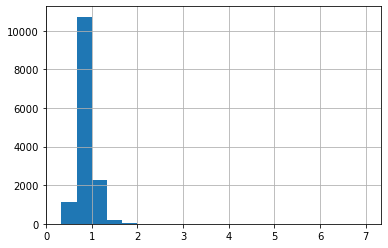

In [117]:
((good_roomcnt_data.bathroomcnt + good_roomcnt_data.bedroomcnt) / good_roomcnt_data.roomcnt).hist(bins=20)

<AxesSubplot:>

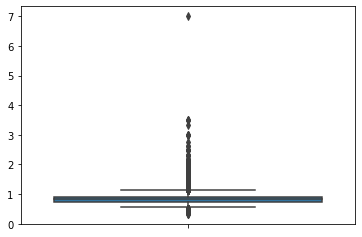

In [124]:
sns.boxplot(y = ((good_roomcnt_data.bathroomcnt + good_roomcnt_data.bedroomcnt) / good_roomcnt_data.roomcnt))

In [112]:
((good_roomcnt_data.bathroomcnt + good_roomcnt_data.bedroomcnt) / good_roomcnt_data.roomcnt).median()

0.8333333333333334

In [118]:
((good_roomcnt_data.bathroomcnt + good_roomcnt_data.bedroomcnt) / good_roomcnt_data.roomcnt).mean()

0.8527028772587043

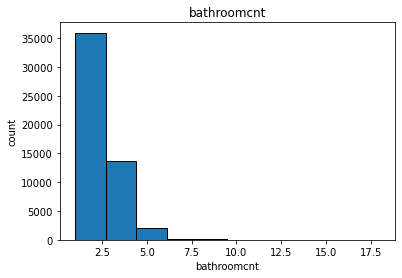

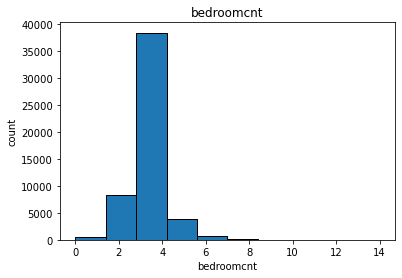

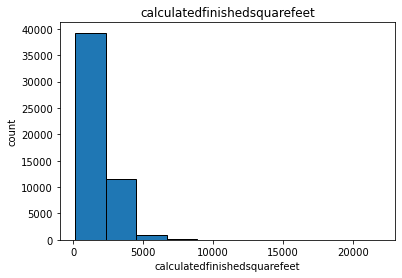

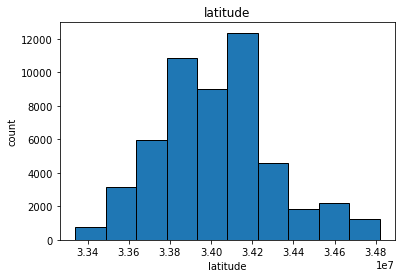

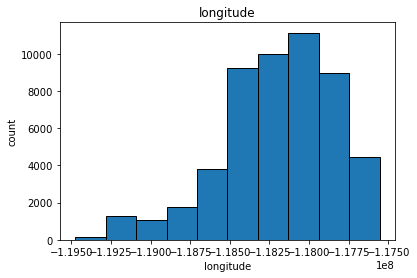

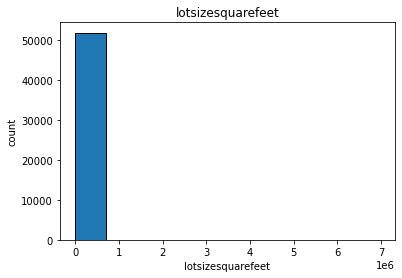

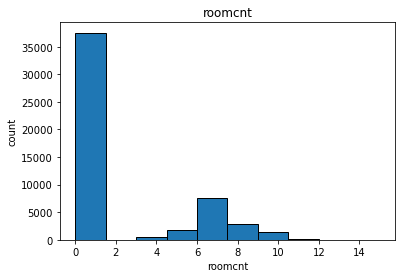

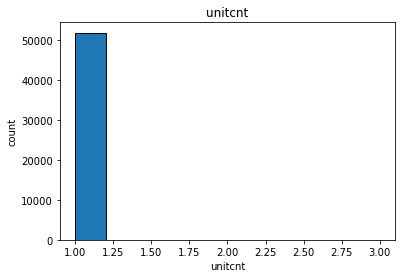

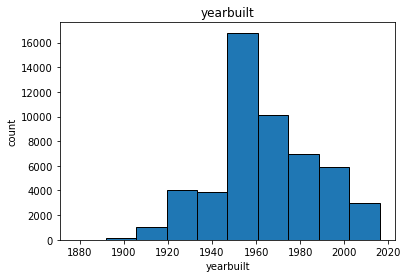

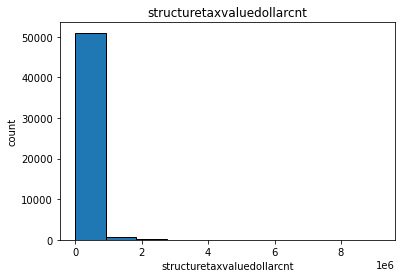

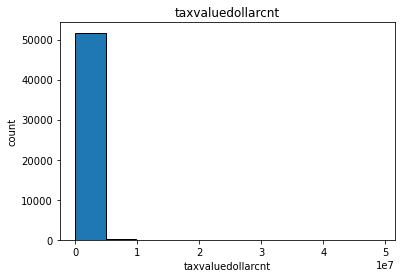

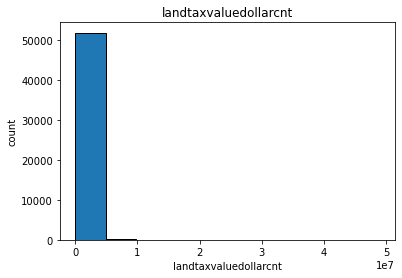

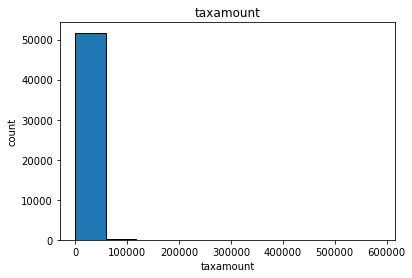

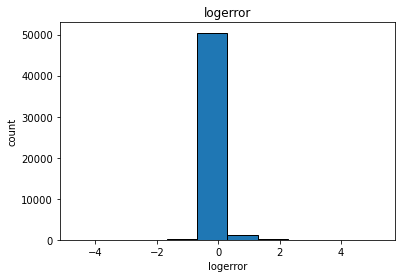

In [93]:
num_cols = df.select_dtypes('number').columns.tolist()
for col in num_cols:
    df[col].hist(edgecolor='black')
    plt.xlabel(col)
    plt.title(col)
    plt.ylabel('count')
    plt.grid(False)
    plt.show()  

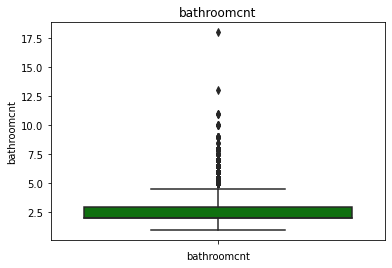

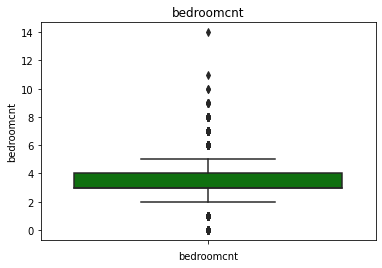

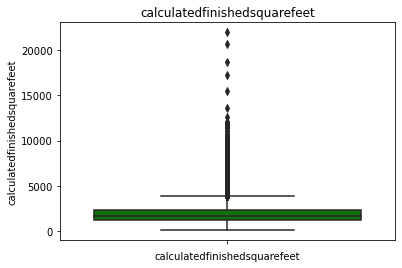

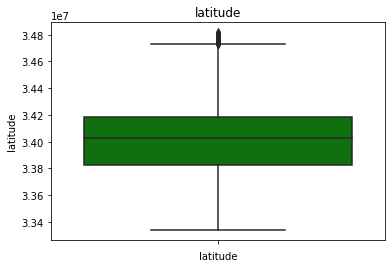

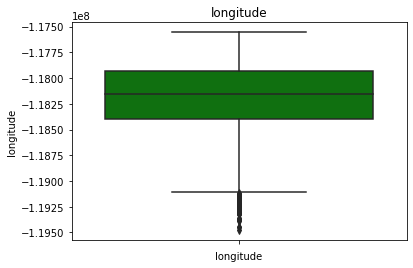

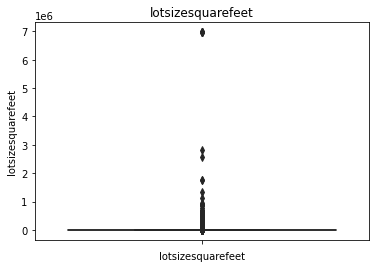

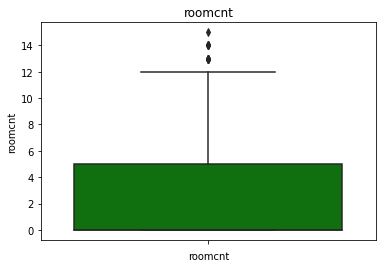

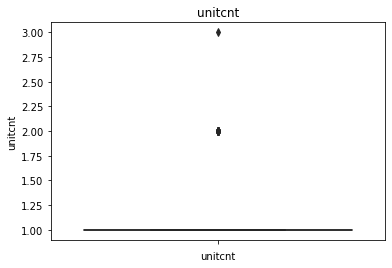

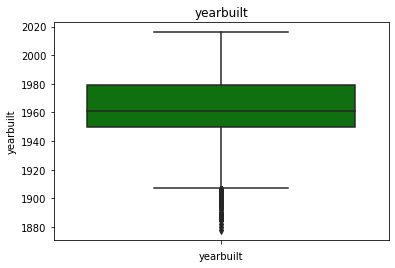

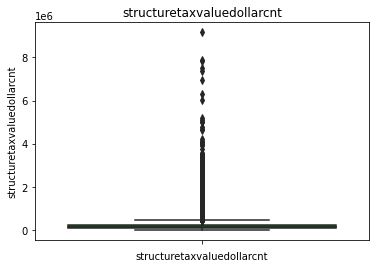

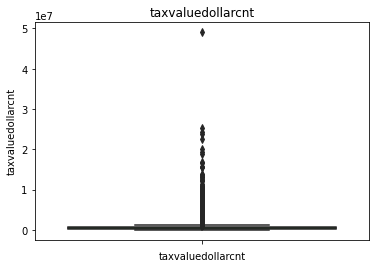

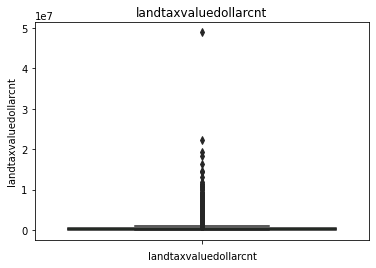

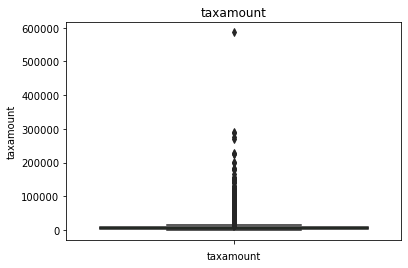

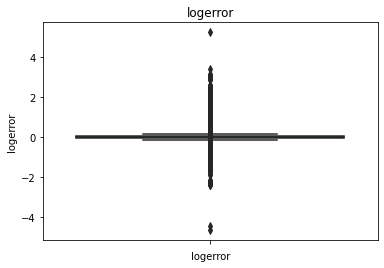

In [127]:
for col in num_cols:
    sns.boxplot(y=col, data=df, color='green')    
    plt.xlabel(col)
    plt.title(col)
    plt.show()

**Where I left off:**
- I have finished removing nulls
- I have finished changing data types
- I am taking a look at final columns to see if they are valuable
    - roomcnt
        - There are a bunch of 0s that need to be imputed
        - I want to use ratio of beds + baths / roomcnt to impute
        - I could just use mean or median, but there a a lot of outliers
        - I need to remove bed and bath outliers before finishing this
- I need to remove outliers for:
    - bedrooms
    - bathrooms
    - sf
    - lot size
    - tax value of 
        - lot
        - improvement
        - property
        - Do i need to keep them all?
            - See if lot + improvement = property
- addtional columns to drop
    - tax amount (derived from assessed value, not needed for exploration)
    - unit count (we are saying these are all single unit based on other columns so if all values are same, no value
- **Once this is complete, I will put it all in a function, split data, and will be ready for exploration**